<a href="https://colab.research.google.com/github/adithyamauryakr/BANDNN_pytorch/blob/main/BANDNN_mirror.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit
!git clone https://github.com/adithyamauryakr/BANDNN_pytorch.git
!git clone https://github.com/isayev/ANI1_dataset.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 16.8 MB/s eta 0:00:00
Cloning into 'BANDNN_pytorch'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 27.24 KiB | 13.62 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Cloning into 'ANI1_dataset'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 81 (delta 6), reused 13 (delta 4), pack-reused 63 (from 1)
Receiving objects: 100% (81/81), 2.69 MiB | 12.52 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [2]:
!export PYTHONPATH="${PYTHONPATH}:/content/ANI1_dataset/readers/lib to PYTHONPATH"

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import lib.pyanitools as pya
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import h5py

features_list = []
with h5py.File('/content/drive/MyDrive/bandnn_datasets/molecules.h5', 'r') as h5f:
    for mol_key in h5f.keys():
        group = h5f[mol_key]
        mol_data = {key: group[key][()] for key in group}
        # Decode bytes to strings if needed
        for k, v in mol_data.items():
            if isinstance(v, bytes):
                mol_data[k] = v.decode('utf-8')
        features_list.append(mol_data)

print(len(features_list))

100000


In [6]:
y = pd.read_csv('/content/drive/MyDrive/bandnn_datasets/energy_list.csv').values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    features_list, y, test_size=0.2, random_state=42
)

In [8]:
class CustomDataset(Dataset):

  def __init__(self, features, targets):
    self.features = features
    self.targets = torch.tensor(targets, dtype=torch.float32)

  def __len__(self):
    return len(self.targets)

  def __getitem__(self, index):
    return self.features[index], self.targets[index]

In [97]:
def custom_collate_fn(batch):
    feature_batch, target_batch = zip(*batch)  # Unpack into tuples of features and targets
    # Convert list of dicts to dict of lists/tensors
    batch_dict = {key: torch.tensor([d[key] for d in feature_batch], dtype=torch.float32)
                  for key in feature_batch[0]}
    batch_targets = torch.tensor(target_batch, dtype=torch.float32)  # or torch.long if it's classification
    return batch_dict, batch_targets

In [9]:
def collate_Fn(batch):
    feature_batch, target_batch = zip(*batch)
    return list(feature_batch), torch.tensor(target_batch, dtype=torch.float32)


In [10]:

train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32,collate_fn=collate_Fn, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, collate_fn=collate_Fn, shuffle=False, pin_memory=True)



In [19]:
for batch in train_loader:
  # this is in training loop
  for feature_dict, target in zip(*batch):
    print(len(feature_dict))
    b_feat = [bond for bond in feature_dict['bonds']]
    a_feat = [angle for angle in feature_dict['angles']]
    n_feat = [nonbond for nonbond in feature_dict['nonbonds']]
    d_feat = [dihedral for dihedral in feature_dict['dihedrals']]
    b_input = [b for b in b_feat]
    # in model
    for b in b_input:
      print(len(b))
    break
  break

4
tensor(-379.8292)
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17


In [9]:
for batch in train_loader:
  for feature, target in zip(*batch):
    a = [bond for bond in feature['bonds']]
    for b in a:
      print(len(b), target)
    # bond_feat = [d['bonds'] for d in feature]


  break

17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-395.5993)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-384.8853)
17 tensor(-399.5984)
17 tensor(-399.5984)
17 tensor(-399.5984)
17 tensor(-399.5984)
17 tensor(-399.5984)
17 tensor(-399.5984)
17 tensor(-399.5984)
17 tensor(-399.5984)
17 tensor(-399.5984)
17 tensor(-399.5984)
17 tensor(-399.5984)
17 tensor(-39

In [76]:
def collate_Fn(batch):
  features_batch = [sample[0] for sample in batch]
  targets_batch = [sample[1] for sample in batch]
  new_feature_list = []
  new_energy_list = []
  for feature, target in zip(features_batch, targets_batch):
    for i in range(len(feature)):
      new_feature_list.append(feature[i])
      new_energy_list.append(target)
  return new_feature_list, new_energy_list

In [ ]:
def collate_Fn(batch):
  features_batch = [sample[0] for sample in batch]
  targets_batch = [sample[1] for sample in batch]
  new_feature_list = []
  new_energy_list = []
  for feature, target in zip(features_batch, targets_batch):
    for i in range(len(feature)):
      new_feature_list.append(feature[i])
      new_energy_list.append(target)
  return new_feature_list, new_energy_list

In [37]:
# create CustomDataset Class

class BondDataset(Dataset):

  def __init__(self, bond_features, targets):
    self.bond_features = bond_features
    self.targets = torch.tensor(targets, dtype=torch.float32)

  def __len__(self):
    return len(self.targets)

  def __getitem__(self, index):
    return self.bond_features[index], self.targets[index]

class AnglesDataset(Dataset):

  def __init__(self, angle_features, targets):

    self.angle_features = angle_features
    self.targets = torch.tensor(targets, dtype=torch.float32)

  def __len__(self):
    return len(self.targets)

  def __getitem__(self, index):
    return self.angle_features[index],  self.targets[index]

class NonbondData(Dataset):

  def __init__(self, nonbond_features, targets):
    self.nonbond_features = nonbond_features
    self.targets = torch.tensor(targets, dtype=torch.float32)

  def __len__(self):
    return len(self.targets)

  def __getitem__(self, index):
    return self.nonbond_features[index], self.targets[index]

class DihedralData(Dataset):

  def __init__(self, dihedral_features, targets):
    self.dihedral_features = dihedral_features
    self.targets = torch.tensor(targets, dtype=torch.float32)

  def __len__(self):
    return len(self.targets)

  def __getitem__(self, index):
    return self.dihedral_features[index], self.targets[index]

In [77]:
# create train_dataset object
X_train_bond_feat = [d['bonds'] for d in X_train]
X_train_angle_feat = [d['angles'] for d in X_train]
X_train_nonbond_feat = [d['nonbonds'] for d in X_train]
X_train_dihedral_feat = [d['dihedrals'] for d in X_train]

X_test_bond_feat = [d['bonds'] for d in X_test]
X_test_angle_feat = [d['angles'] for d in X_test]
X_test_nonbond_feat = [d['nonbonds'] for d in X_test]
X_test_dihedral_Feat = [d['dihedrals'] for d in X_test]

In [78]:
train_dataset1 = BondDataset(X_train_bond_feat, y_train)
test_dataset1 = BondDataset(X_test_bond_feat, y_test)

train_dataset2 = AnglesDataset(X_train_angle_feat, y_train)
test_dataset2 = AnglesDataset(X_test_angle_feat, y_test)

train_dataset3 = NonbondData(X_train_nonbond_feat, y_train)
test_dataset3 = NonbondData(X_test_nonbond_feat, y_test)

train_trainset4 = DihedralData(X_train_dihedral_feat, y_train)
test_dataset4 = DihedralData(X_test_dihedral_Feat, y_test)

In [79]:
train_loader1 = DataLoader(train_dataset1, batch_size=32,collate_fn=collate_Fn, shuffle=True, pin_memory=True)
test_loader1 = DataLoader(test_dataset1, batch_size=32, collate_fn=collate_Fn, shuffle=False, pin_memory=True)

train_loader2 = DataLoader(train_dataset2, batch_size=32, collate_fn=collate_Fn, shuffle=True, pin_memory=True)
test_loader2 = DataLoader(test_dataset2, batch_size=32, collate_fn=collate_Fn, shuffle=False, pin_memory=True)

train_loader3 = DataLoader(train_dataset3, batch_size=32, collate_fn=collate_Fn, shuffle=True, pin_memory=True)
test_loader3 = DataLoader(test_dataset3, batch_size=32, collate_fn=collate_Fn, shuffle=False, pin_memory=True)

train_loader4 = DataLoader(train_trainset4, batch_size=32, collate_fn=collate_Fn, shuffle=True, pin_memory=True)
test_loader4 = DataLoader(test_dataset4, batch_size=32, collate_fn=collate_Fn, shuffle=False, pin_memory=True)

In [15]:
# create CustomDataset Class

class CustomDataset(Dataset):

  def __init__(self, bond_features, angle_features, nonbond_features, dihedral_features, targets):
    self.bond_features = bond_features
    self.angle_features = angle_features
    self.nonbond_features = nonbond_features
    self.dihedral_features = dihedral_features
    self.targets = torch.tensor(targets, dtype=torch.float32)

  def __len__(self):
    return len(self.bond_features)

  def __getitem__(self, index):
    return self.bond_features[index], self.angle_features[index], self.nonbond_features[index], self.dihedral_features[index], self.targets[index]


In [72]:
dataset = BondDataset(X_train_bond_feat, y_train)
train_loader = DataLoader(dataset, batch_size=4, collate_fn=collate_Fn)
for b, t in train_loader:
  print('lengths:',len(b), len(t))

  break

lengths: 76 76


In [26]:
len(b)

21

(array([  295.,   868.,  2618.,  5755.,  7832., 16837., 20639., 25447.,
        14928.,  4781.]),
 array([-471.57122759, -455.4379652 , -439.3047028 , -423.17144041,
        -407.03817801, -390.90491562, -374.77165322, -358.63839082,
        -342.50512843, -326.37186603, -310.23860364]),
 <BarContainer object of 10 artists>)

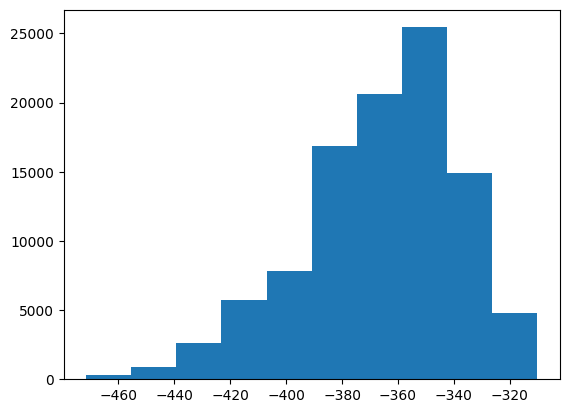

In [14]:
import matplotlib.pyplot as plt

plt.hist(y)

In [15]:
BONDS_DIM, ANGLES_DIM, NONBONDS_DIM, DIHEDRALS_DIM = 17, 27, 17, 38

In [13]:
def make_tensor(seq):
    return torch.tensor(seq, dtype=torch.float32, requires_grad=True)

In [12]:
class BANDNN(nn.Module):

  def __init__(self, bonds_input_dim, angles_input_dim, nonbonds_input_dim, dihedral_input_dim):
    super().__init__()
    self.bonds_model = nn.Sequential(
        nn.Linear(bonds_input_dim, 128),
        nn.ReLU(),
        nn.Linear(128, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, 1)
    )

    self.angles_model = nn.Sequential(
        nn.Linear(angles_input_dim, 128),
        nn.ReLU(),
        nn.Linear(128, 350),
        nn.ReLU(),
        nn.Linear(350, 128),
        nn.ReLU(),
        nn.Linear(128, 1)
    )

    self.nonbonds_model = nn.Sequential(
        nn.Linear(nonbonds_input_dim, 128),
        nn.ReLU(),
        nn.Linear(128, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, 1)
    )

    self.dihedrals_model = nn.Sequential(
        nn.Linear(dihedral_input_dim, 128),
        nn.ReLU(),
        nn.Linear(128, 512),
        nn.ReLU(),
        nn.Linear(512, 128),
        nn.ReLU(),
        nn.Linear(128, 1)
    )

  def forward(self, bonds_input,angles_input, non_bonds_input, dihedrals_input):


    bonds_energy = make_tensor([self.bonds_model(make_tensor(bond_input)) for bond_input in bonds_input])
    angles_energy = make_tensor([self.angles_model(make_tensor(angle_input)) for angle_input in angles_input])
    nonbonds_energy = make_tensor([self.nonbonds_model(make_tensor(non_bond_input))for non_bond_input in non_bonds_input])
    dihedrals_energy =  make_tensor([self.dihedrals_model(make_tensor(dihedral_input)) for dihedral_input in dihedrals_input])
    total_energy =  torch.sum(bonds_energy) + torch.sum(angles_energy) + torch.sum(nonbonds_energy) + torch.sum(dihedrals_energy)

    return total_energy

In [11]:
class BANDNN(nn.Module):
    def __init__(self, bonds_input_dim, angles_input_dim, nonbonds_input_dim, dihedral_input_dim):
        super().__init__()
        self.bonds_model = nn.Sequential(
            nn.Linear(bonds_input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
        self.angles_model = nn.Sequential(
            nn.Linear(angles_input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 350),
            nn.ReLU(),
            nn.Linear(350, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
        self.nonbonds_model = nn.Sequential(
            nn.Linear(nonbonds_input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
        self.dihedrals_model = nn.Sequential(
            nn.Linear(dihedral_input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, bonds_input, angles_input, non_bonds_input, dihedrals_input):
        bonds_energy = self.bonds_model(bonds_input).sum()
        angles_energy = self.angles_model(angles_input).sum()
        nonbonds_energy = self.nonbonds_model(non_bonds_input).sum()
        dihedrals_energy = self.dihedrals_model(dihedrals_input).sum()

        total_energy = bonds_energy + angles_energy + nonbonds_energy + dihedrals_energy
        return total_energy


In [12]:
!pip install torchinfo

In [16]:
from torchinfo import summary
model = BANDNN(BONDS_DIM, ANGLES_DIM, NONBONDS_DIM, DIHEDRALS_DIM)
model = model.to(device)
# model.summary()
summary(model)

Layer (type:depth-idx)                   Param #
BANDNN                                   --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       2,304
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       33,024
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       32,896
│    └─ReLU: 2-6                         --
│    └─Linear: 2-7                       129
├─Sequential: 1-2                        --
│    └─Linear: 2-8                       3,584
│    └─ReLU: 2-9                         --
│    └─Linear: 2-10                      45,150
│    └─ReLU: 2-11                        --
│    └─Linear: 2-12                      44,928
│    └─ReLU: 2-13                        --
│    └─Linear: 2-14                      129
├─Sequential: 1-3                        --
│    └─Linear: 2-15                      2,304
│    └─ReLU: 2-16                        --
│    └─Linear: 2-17                      33,

In [17]:
epochs = 20
learning_rate = 0.1

# loss func
criterion = nn.MSELoss()

# optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}')
    total_epoch_loss = 0

    for batch in train_loader:
        for feature, target in zip(*batch):
            bond_feat = torch.stack([torch.tensor(arr, dtype=torch.float32) for arr in feature['bonds']]).float().to(device)
            angle_feat = torch.stack([torch.tensor(arr, dtype=torch.float32) for arr in feature['angles']]).float().to(device)
            nonbond_feat = torch.stack([torch.tensor(arr, dtype=torch.float32) for arr in feature['nonbonds']]).float().to(device)
            dihedral_feat = torch.stack([torch.tensor(arr, dtype=torch.float32) for arr in feature['dihedrals']]).float().to(device)
            energy_feat = torch.tensor([target], dtype=torch.float32).to(device)

            optimizer.zero_grad()
            outputs = model(bond_feat, angle_feat, nonbond_feat, dihedral_feat)
            loss = criterion(outputs, energy_feat)
            loss.backward()
            optimizer.step()

            total_epoch_loss += loss.item()

    avg_loss = total_epoch_loss / len(train_loader)
    print(f'Average Loss: {avg_loss:.4f}')


Epoch 1


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Average Loss: 13993593.9400
Epoch 2
Average Loss: 46146.8688
Epoch 3
Average Loss: 46307.9569
Epoch 4
Average Loss: 46188.7296
Epoch 5
Average Loss: 46090.8090
Epoch 6
Average Loss: 46220.3198
Epoch 7
Average Loss: 46356.1518
Epoch 8
Average Loss: 46454.3448
Epoch 9
Average Loss: 46186.1744
Epoch 10
Average Loss: 46233.9721
Epoch 11
Average Loss: 46293.8763
Epoch 12
Average Loss: 46445.6029
Epoch 13
Average Loss: 46438.3128
Epoch 14
Average Loss: 46432.8343
Epoch 15
Average Loss: 46544.1845
Epoch 16
Average Loss: 46287.3948
Epoch 17
Average Loss: 46213.1388
Epoch 18
Average Loss: 45958.2199
Epoch 19
Average Loss: 46444.4479
Epoch 20
Average Loss: 46576.0270


In [22]:
torch.save(model, 'BANDNN-trained-190425.pth')

In [18]:
# training loop
for epoch in range(epochs):
    print('epoch, number', epoch)
    total_epoch_loss = 0
    for batch in train_loader:

      for feature, target in zip(*batch):
        bond_feat = torch.tensor([bond for bond in feature['bonds']], dtype=torch.float32, requires_grad=True)
        angle_feat = torch.tensor([angle for angle in feature['angles']], dtype=torch.float32, requires_grad=True)
        nonbond_feat = torch.tensor([nonbond for nonbond in feature['nonbonds']], dtype=torch.float32, requires_grad=True)
        dihedral_feat = torch.tensor([dihedral for dihedral in feature['dihedrals']], dtype=torch.float32, requires_grad=True)

        bond_feat = bond_feat.to(device)
        angle_feat = angle_feat.to(device)
        nonbond_feat = nonbond_feat.to(device)
        dihedral_feat = dihedral_feat.to(device)
        energy_feat = torch.tensor(target, dtype=torch.float32, requires_grad=True).to(device)

        outputs = model(bond_feat, angle_feat, nonbond_feat, dihedral_feat).to(device)

        loss = criterion(outputs, energy_feat)

        optimizer.zero_grad()

        # back pass
        loss.backward()

        # update params
        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item()

    avg_loss = total_epoch_loss/len(train_loader)
    print(f'Epoch {epoch+1}, Loss: {avg_loss: .4f}')

epoch, number 0


<ipython-input-18-8c7c59d5484c>:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  bond_feat = torch.tensor([bond for bond in feature['bonds']], dtype=torch.float32, requires_grad=True)
<ipython-input-18-8c7c59d5484c>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  energy_feat = torch.tensor(target, dtype=torch.float32, requires_grad=True).to(device)
<ipython-input-13-0c50ae6595e1>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(seq, dtype=torch.float

KeyboardInterrupt: 

In [ ]:
model.eval()

BANDNN(
  (bonds_model): Sequential(
    (0): Linear(in_features=17, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
  (angles_model): Sequential(
    (0): Linear(in_features=27, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=350, bias=True)
    (3): ReLU()
    (4): Linear(in_features=350, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
  (nonbonds_model): Sequential(
    (0): Linear(in_features=17, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
  (dihedra